In [95]:
import json
import pandas as pd
import sqlalchemy
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker 
from datetime import datetime, timedelta,date
import pycountry_convert as pc
from scipy.interpolate import make_interp_spline, BSpline
# import plotly.express as px
import numpy as np

import keras
from keras.layers import Input, Dense, Activation, LeakyReLU, Softmax
from keras import models
from keras.optimizers import RMSprop, Adam

import base64
from copy import deepcopy

# import dash package, please make sure installing the same version in the requirements.txt
import dash
import dash_core_components as dcc
import dash_html_components as html
import dash_table
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import statsmodels.formula.api as smf
# from dash.dependencies import Input, Output
# import the different styles from styles.py
from styles import GRAPH_LAYOUT, TABLE_STYLE, TAB_NORMAL_STYLE, TAB_SELECTED_STYLE
 
import plotly.express as px
from pandas.plotting import table
from plotly.colors import n_colors
import dataframe_image as dfi

%matplotlib inline

<h2>Connect Database</h2>

In [145]:
# util functions
def get_db_url(settings):
    """Make postgres db url"""
    db_url = (
        'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}'
    ).format(**settings)
    return db_url

def get_db_engine(settings):
    """Get sqlalchamy object for the db connection"""
    db_connection_string = get_db_url(settings)
    return sqlalchemy.create_engine(db_connection_string)

# get the db connection
# database code is hidden
db_engine = get_db_engine(settings)

In [146]:
# create the query
sql = """
"""

In [147]:
# create the query
sql1 = """
"""

In [151]:
# query data from db 
covid_by_region_df = pd.read_sql(sql=sql1, con=db_engine)
covid_by_region_df2 = pd.read_sql(sql=sql2, con=db_engine)

In [152]:
covid_by_region_df

,date,country_region,state_province,confirmed,deaths
0,2020-01-22,Afghanistan,NaN,0,0
1,2020-01-22,Albania,NaN,0,0
2,2020-01-22,Algeria,NaN,0,0
3,2020-01-22,Andorra,NaN,0,0
4,2020-01-22,Angola,NaN,0,0
...,...,...,...,...,...
77715,2020-11-06,West Bank and Gaza,NaN,57226,511
77716,2020-11-06,Western Sahara,NaN,10,1
77717,2020-11-06,Yemen,NaN,2067,602
77718,2020-11-06,Zambia,NaN,16819,349


In [39]:
# Retriving Dataset
df_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

# Depricated
df_recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
df_cases_country = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")
df_table = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_time.csv")

df_owid_data = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")

df_gmobility = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/gmobility/Google%20Mobility%20Trends%20(2020).csv")

C:\Users\keyur_shrimali\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [74]:
df_cases_country

,country,continent,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
0,Afghanistan,Asia,2020-11-06 19:24:44,33.939110,67.709953,41975.0,1554.0,34440.0,5981.0,107.826326,NaN,NaN,3.702204,4,AFG
1,Albania,Europe,2020-11-06 19:24:44,41.153300,20.168300,23210.0,549.0,11861.0,10800.0,806.518869,NaN,NaN,2.365360,8,ALB
2,Algeria,Africa,2020-11-06 19:24:44,28.033900,1.659600,60800.0,2024.0,41510.0,17266.0,138.651206,NaN,NaN,3.328947,12,DZA
3,Andorra,Europe,2020-11-06 19:24:44,42.506300,1.521800,5135.0,75.0,3858.0,1202.0,6645.958714,NaN,NaN,1.460565,20,AND
4,Angola,Africa,2020-11-06 19:24:44,-11.202700,17.873900,12102.0,299.0,5350.0,6453.0,36.821948,NaN,NaN,2.470666,24,AGO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,West Bank and Gaza,Others,2020-11-06 19:24:44,31.952200,35.233200,57226.0,511.0,49537.0,7178.0,1121.766976,NaN,NaN,0.892951,275,PSE
186,Western Sahara,Others,2020-11-06 19:24:44,24.215500,-12.885800,10.0,1.0,8.0,1.0,1.674116,NaN,NaN,10.000000,732,ESH
187,Yemen,Asia,2020-11-06 19:24:44,15.552727,48.516388,2063.0,601.0,1375.0,87.0,6.916791,NaN,NaN,29.132332,887,YEM
188,Zambia,Africa,2020-11-06 19:24:44,-13.133897,27.849332,16819.0,349.0,15862.0,608.0,91.487382,NaN,NaN,2.075034,894,ZMB


In [40]:
df_cases_country = df_cases_country.drop(["People_Tested","People_Hospitalized","UID","ISO3","Mortality_Rate"],axis =1)
df_cases_country.head()

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate
0,Afghanistan,2020-11-08 18:25:01,33.93911,67.709953,42092.0,1558.0,34458.0,6076.0,108.126879
1,Albania,2020-11-08 18:25:01,41.15330,20.168300,24206.0,559.0,12092.0,11555.0,841.128640
2,Algeria,2020-11-08 18:25:01,28.03390,1.659600,62051.0,2048.0,42037.0,17966.0,141.504046
3,Andorra,2020-11-08 18:25:01,42.50630,1.521800,5319.0,75.0,4043.0,1201.0,6884.100175
4,Angola,2020-11-08 18:25:01,-11.20270,17.873900,12335.0,303.0,5647.0,6385.0,37.530881


In [42]:
df_confirmed = df_confirmed.rename(columns={"Province/State":"state","Country/Region": "country"})
df_deaths = df_deaths.rename(columns={"Province/State":"state","Country/Region": "country"})
df_cases_country = df_cases_country.rename(columns={"Country_Region": "country"})
df_cases_country["Active"] = df_cases_country["Confirmed"]-df_cases_country["Recovered"]-df_cases_country["Deaths"]
df_recovered = df_recovered.rename(columns={"Province/State":"state","Country/Region": "country"})
df_table = df_table.rename(columns={"Country_Region": "country"})


In [43]:
# Changing the conuntry names as required by pycountry_convert Lib
df_confirmed.loc[df_confirmed['country'] == "US", "country"] = "USA"
df_deaths.loc[df_deaths['country'] == "US", "country"] = "USA"
df_cases_country.loc[df_cases_country['country'] == "US", "country"] = "USA"
df_table.loc[df_table['country'] == "US", "country"] = "USA"
df_recovered.loc[df_recovered['country'] == "US", "country"] = "USA"

df_confirmed.loc[df_confirmed['country'] == 'Korea, South', "country"] = 'South Korea'
df_deaths.loc[df_deaths['country'] == 'Korea, South', "country"] = 'South Korea'
df_cases_country.loc[df_cases_country['country'] == "Korea, South", "country"] = "South Korea"
df_table.loc[df_table['country'] == "Korea, South", "country"] = "South Korea"
df_recovered.loc[df_recovered['country'] == 'Korea, South', "country"] = 'South Korea'

df_confirmed.loc[df_confirmed['country'] == 'Taiwan*', "country"] = 'Taiwan'
df_deaths.loc[df_deaths['country'] == 'Taiwan*', "country"] = 'Taiwan'
df_cases_country.loc[df_cases_country['country'] == "Taiwan*", "country"] = "Taiwan"
df_table.loc[df_table['country'] == "Taiwan*", "country"] = "Taiwan"
df_recovered.loc[df_recovered['country'] == 'Taiwan*', "country"] = 'Taiwan'

df_confirmed.loc[df_confirmed['country'] == 'Congo (Kinshasa)', "country"] = 'Democratic Republic of the Congo'
df_deaths.loc[df_deaths['country'] == 'Congo (Kinshasa)', "country"] = 'Democratic Republic of the Congo'
df_cases_country.loc[df_cases_country['country'] == "Congo (Kinshasa)", "country"] = "Democratic Republic of the Congo"
df_table.loc[df_table['country'] == "Congo (Kinshasa)", "country"] = "Democratic Republic of the Congo"
df_recovered.loc[df_recovered['country'] == 'Congo (Kinshasa)', "country"] = 'Democratic Republic of the Congo'

df_confirmed.loc[df_confirmed['country'] == "Cote d'Ivoire", "country"] = "Côte d'Ivoire"
df_deaths.loc[df_deaths['country'] == "Cote d'Ivoire", "country"] = "Côte d'Ivoire"
df_cases_country.loc[df_cases_country['country'] == "Cote d'Ivoire", "country"] = "Côte d'Ivoire"
df_table.loc[df_table['country'] == "Cote d'Ivoire", "country"] = "Côte d'Ivoire"
df_recovered.loc[df_recovered['country'] == "Cote d'Ivoire", "country"] = "Côte d'Ivoire"

df_confirmed.loc[df_confirmed['country'] == "Reunion", "country"] = "Réunion"
df_deaths.loc[df_deaths['country'] == "Reunion", "country"] = "Réunion"
df_cases_country.loc[df_cases_country['country'] == "Reunion", "country"] = "Réunion"
df_table.loc[df_table['country'] == "Reunion", "country"] = "Réunion"
df_recovered.loc[df_recovered['country'] == "Reunion", "country"] = "Réunion"

df_confirmed.loc[df_confirmed['country'] == 'Congo (Brazzaville)', "country"] = 'Republic of the Congo'
df_deaths.loc[df_deaths['country'] == 'Congo (Brazzaville)', "country"] = 'Republic of the Congo'
df_cases_country.loc[df_cases_country['country'] == "Congo (Brazzaville)", "country"] = "Republic of the Congo"
df_table.loc[df_table['country'] == "Congo (Brazzaville)", "country"] = "Republic of the Congo"
df_recovered.loc[df_recovered['country'] == 'Congo (Brazzaville)', "country"] = 'Republic of the Congo'

df_confirmed.loc[df_confirmed['country'] == 'Bahamas, The', "country"] = 'Bahamas'
df_deaths.loc[df_deaths['country'] == 'Bahamas, The', "country"] = 'Bahamas'
df_cases_country.loc[df_cases_country['country'] == "Bahamas, The", "country"] = "Bahamas"
df_table.loc[df_table['country'] == "Bahamas, The", "country"] = "Bahamas"
df_recovered.loc[df_recovered['country'] == 'Bahamas, The', "country"] = 'Bahamas'

df_confirmed.loc[df_confirmed['country'] == 'Gambia, The', "country"] = 'Gambia'
df_deaths.loc[df_deaths['country'] == 'Gambia, The', "country"] = 'Gambia'
df_cases_country.loc[df_cases_country['country'] == "Gambia, The", "country"] = "Gambia"
df_table.loc[df_table['country'] == "Gambia", "country"] = "Gambia"
df_recovered.loc[df_recovered['country'] == 'Gambia, The', "country"] = 'Gambia'


In [44]:
# getting all countries
countries = np.asarray(df_confirmed["country"])
countries1 = np.asarray(df_cases_country["country"])

# Continent_code to Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Defininng Function for getting continent code for country.
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country, cn_name_format="default"))
    except :
        return 'na'

#Collecting Continent Information
df_confirmed.insert(2,"continent", [continents[country_to_continent_code(country)] for country in countries[:]])
df_deaths.insert(2,"continent",  [continents[country_to_continent_code(country)] for country in countries[:]])
df_cases_country.insert(1,"continent",  [continents[country_to_continent_code(country)] for country in countries1[:]])
df_table.insert(1,"continent",  [continents[country_to_continent_code(country)] for country in df_table["country"].values])
# df_recovered.insert(2,"continent",  [continents[country_to_continent_code(country)] for country in countries[:]] )

In [45]:
df_confirmed = df_confirmed.replace(np.nan, '', regex=True)
df_deaths = df_deaths.replace(np.nan, '', regex=True)
df_recovered = df_recovered.replace(np.nan, '', regex=True)
df_table = df_table.replace(np.nan, '', regex=True)

In [46]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)
    
def visualize_covid_cases(confirmed, deaths, continent=None , country = None , state = None, period = None, figure = None, scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]
    
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["darkcyan","crimson"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else :
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)

    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = "From "+stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 5 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-6])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-6])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+df_confirmed.columns[5]+" - "+df_confirmed.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)
    
    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19 Cases for "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()
        
def get_total_cases(cases, country = "All"):
    if(country == "All") : 
        return np.sum(np.asarray(cases.iloc[:,5:]),axis = 0)[-1]
    else :
        return np.sum(np.asarray(cases[cases["country"] == country].iloc[:,5:]),axis = 0)[-1]
    
def get_mortality_rate(confirmed,deaths, continent = None, country = None):
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else :
        params = ["All", "All"]
    
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(confirmed.iloc[:,5:]),axis = 0)
        Total_deaths = np.sum(np.asarray(deaths.iloc[:,5:]),axis = 0)
        mortality_rate = np.round((Total_deaths/(Total_confirmed+1.01))*100,2)
    else :
        Total_confirmed =  np.sum(np.asarray(confirmed[confirmed[params[0]] == params[1]].iloc[:,5:]),axis = 0)
        Total_deaths = np.sum(np.asarray(deaths[deaths[params[0]] == params[1]].iloc[:,5:]),axis = 0)
        mortality_rate = np.round((Total_deaths/(Total_confirmed+1.01))*100,2)
    
    return np.nan_to_num(mortality_rate)
def dd(date1,date2):
    return (datetime.strptime(date1,'%m/%d/%y') - datetime.strptime(date2,'%m/%d/%y')).days



In [47]:
df_countries_cases = df_cases_country.copy().drop(['Lat','Long_','continent','Last_Update'],axis =1)
df_countries_cases.index = df_countries_cases["country"]
df_countries_cases = df_countries_cases.drop(['country'],axis=1)

df_continents_cases = df_cases_country.copy().drop(['Lat','Long_','country','Last_Update'],axis =1)
df_continents_cases = df_continents_cases.groupby(["continent"]).sum()

df_countries_cases.fillna(0,inplace=True)
df_continents_cases.fillna(0,inplace=True)

In [48]:
df_owid_table = df_owid_data.drop(['iso_code', 'continent', 'new_cases_smoothed','new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million','total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'tests_units','population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index'],axis =1)
df_owid_table = df_owid_table.replace(np.nan, 0, regex=True)
# df_owid_table

<h2>Global Cases</h2>

In [186]:
df_t = pd.DataFrame(pd.to_numeric(df_countries_cases.sum()),dtype=np.float64).transpose()
df_t["Mortality Rate (per 100)"] = np.round(100*df_t["Deaths"]/df_t["Confirmed"],2)
df_t

,Confirmed,Deaths,Recovered,Active,Incident_Rate,Mortality Rate (per 100)
0,50111147.0,1253707.0,32892365.0,15762771.0,170537.907376,2.5


In [142]:
cols = 1
rows = 1
f = plt.figure(figsize=(10,10*rows))

visualize_covid_cases(df_confirmed, df_deaths,country = "All",figure = [f,rows,cols, 1])

# plt.savefig('COIVD-19-World.png')
plt.show()

In [141]:
df_continents_cases["Mortality Rate (per 100)"] = np.round(100*df_continents_cases["Deaths"]/df_continents_cases["Confirmed"],2)
df_continents_cases = df_continents_cases.style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Recovered"])\
                        .background_gradient(cmap='Purples',subset=["Active"])\
                        .background_gradient(cmap='Pastel1_r',subset=["Incident_Rate"])\
                        .background_gradient(cmap='YlOrBr',subset=["Mortality Rate (per 100)"])
df_continents_cases
# dfi.export(df_continents_cases, 'continent_table.png')

In [134]:
# df_countries_cases.sort_values('Confirmed', ascending= False).style.background_gradient(cmap='Wistia')
df_countries_cases["Mortality Rate (per 100)"] = np.round(100*df_countries_cases["Deaths"]/df_countries_cases["Confirmed"],2)
dc = df_countries_cases.head(10)
dc = dc.sort_values('Confirmed', ascending= False).style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Recovered"])\
                        .background_gradient(cmap='Purples',subset=["Active"])\
                        .background_gradient(cmap='Pastel1_r',subset=["Incident_Rate"])\
                        .background_gradient(cmap='YlOrBr',subset=["Mortality Rate (per 100)"])

# dfi.export(dc, 'country_table.png')
# dc

In [135]:
df_countries = df_confirmed.groupby(["country"]).sum()
df_countries = df_countries.sort_values(df_countries.columns[-1],ascending = False)
countries = df_countries.index
country_name = 'USA'
cols =2
rows = int(np.ceil(countries.shape[0]/cols))
f = plt.figure(figsize=(18,7*rows))
# for i,country in enumerate(countries):
#     visualize_covid_cases(df_confirmed, df_deaths,country = country,figure = [f,rows,cols, i+1])
visualize_covid_cases(df_confirmed, df_deaths,country = country_name,figure = [f,rows,cols, 1])
# plt.savefig("Cases_"+country_name+".png")
# plt.show()

<h2>Prediction For Global Confirmed Cases</h2>

In [167]:
#Building Model

Visible = Input(shape=(1,))
Dense_l1 = Dense(80,name="Dense_l1")(Visible)
LRelu_l1 = LeakyReLU(name = "LRelu_l1")(Dense_l1)

Dense_l2 = Dense(80,name = "Dense_l2")(LRelu_l1)
LRelu_l2 = LeakyReLU(name = "LRelu_l2")(Dense_l2)

Dense_l3 = Dense(80,name = "Dense_l3")(LRelu_l2)
LRelu_l3 = LeakyReLU(name = "LRelu_l3")(Dense_l3)

Dense_l4 = Dense(1,name="Dense_l4")(LRelu_l3)
LRelu_l4 = LeakyReLU(name = "Output")(Dense_l4
                                     )
model = models.Model(inputs=Visible, outputs=LRelu_l4)
model.compile(optimizer='adam', 
              loss='mean_absolute_error',
              metrics=['accuracy'])
model.summary()

Model: "model_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        (None, 1)                 0         
_________________________________________________________________
Dense_l1 (Dense)             (None, 80)                160       
_________________________________________________________________
LRelu_l1 (LeakyReLU)         (None, 80)                0         
_________________________________________________________________
Dense_l2 (Dense)             (None, 80)                6480      
_________________________________________________________________
LRelu_l2 (LeakyReLU)         (None, 80)                0         
_________________________________________________________________
Dense_l3 (Dense)             (None, 80)                6480      
_________________________________________________________________
LRelu_l3 (LeakyReLU)         (None, 80)                0  

In [69]:
model_country = models.Model(inputs=Visible, outputs=LRelu_l4)
model_country.compile(optimizer=Adam(lr=0.001), 
              loss='mean_absolute_error',
              metrics=['accuracy'])

In [172]:
df_confirmed

,state,country,continent,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20
0,,Afghanistan,Asia,33.939110,67.709953,0,0,0,0,0,...,41268,41334,41425,41501,41633,41728,41814,41935,41975,42033
1,,Albania,Europe,41.153300,20.168300,0,0,0,0,0,...,20315,20634,20875,21202,21523,21904,22300,22721,23210,23705
2,,Algeria,Africa,28.033900,1.659600,0,0,0,0,0,...,57332,57651,57942,58272,58574,58979,59527,60169,60800,61381
3,,Andorra,Europe,42.506300,1.521800,0,0,0,0,0,...,4567,4665,4756,4825,4888,4910,5045,5135,5135,5319
4,,Angola,Africa,-11.202700,17.873900,0,0,0,0,0,...,10269,10558,10805,11035,11228,11577,11813,12102,12223,12335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,,West Bank and Gaza,Others,31.952200,35.233200,0,0,0,0,0,...,52571,53075,53520,54060,54775,55408,56090,56672,57226,57657
264,,Western Sahara,Others,24.215500,-12.885800,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
265,,Yemen,Asia,15.552727,48.516388,0,0,0,0,0,...,2062,2062,2063,2063,2063,2063,2063,2063,2067,2070
266,,Zambia,Africa,-13.133897,27.849332,0,0,0,0,0,...,16325,16415,16432,16480,16543,16661,16698,16770,16819,16908


In [58]:
data1_y = np.log10(np.asarray(df_confirmed.iloc[:,5:].sum(axis =0)).astype("float32"))
data1_x = np.arange(1,len(data1_y)+1)

In [ ]:
epochs=5000
model.fit(data1_x.reshape([data1_y.shape[0],1]),data1_y.reshape([data1_y.shape[0],1]),epochs=epochs)

In [171]:
score, acc = model.evaluate(data1_x,data1_y)
print('Test accuracy:', acc)

291/291 [==============================] - 0s 21us/step
Test accuracy:69.52368


In [21]:
model.save('model_confirmed_cases.h5')

In [153]:
model = models.load_model("model_confirmed_v4.h5")

million = 1000000
prediction_days = 10
case_nums_country = df_confirmed.groupby("country").sum().drop(['Lat','Long'],axis =1).apply(lambda x: x[x > 0].count(), axis =0)
d = [datetime.strptime(date,'%m/%d/%y').strftime("%d %b") for date in case_nums_country.index]

df_data = df_confirmed.iloc[:,5:].sum(axis =0)
data = np.power(10,model.predict(np.arange(1,len(df_data)+prediction_days+1)))
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(111)

date = np.arange(0,len(df_data))

marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=7, markerfacecolor='#ffffff')
plt.plot(date,df_data/million,"-.",color="darkcyan",**marker_style, label="Actual Curve")

date = np.arange(0,len(data))
plt.plot(date,data/million,"-.",color="orangered",label="Predicted Curve")

nextdays = [(datetime.strptime(d[-1],'%d %b')+timedelta(days=i)).strftime("%d %b") for i in range(1,prediction_days+1)]
total = d + nextdays

text = "Prediction for next "+str(prediction_days) +" days:\n"
for i in range(prediction_days):
    text += nextdays[i]+" : "+str(np.round(data[-1*(prediction_days-i)],-3)[0]/million)+" M\n"

plt.text(0.02, 0.78, text, fontsize=17, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))

# X-axis
plt.xticks(list(np.arange(0,len(total),int(len(total)/5))),d[:-1:int(len(total)/5)]+[total[-1]])

# Tick-Parameters
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.tick_params(which='both', width=1,labelsize=14)
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=3, color='0.8')

# Grid
plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

# Plot Title
plt.title("COVID-19 Next 10 day Prediction Curve for Global Confirmed Cases",{'fontsize':22})

# Axis Lable
plt.xlabel("Date",fontsize =18)
plt.ylabel("Number of Confirmed Cases (Millions)",fontsize =18)

# plt.yscale("log")
plt.legend(fontsize =18)
plt.tick_params(labelsize = 13) 
# plt.savefig("Prediction_confirmed.png")
plt.show()

<h2>Countrywise Prediction for Confirmed Cases</h2>

In [ ]:
#Building Model

Visible = Input(shape=(1,))
Dense_l1 = Dense(80,name="Dense_l1")(Visible)
LRelu_l1 = LeakyReLU(name = "LRelu_l1")(Dense_l1)

Dense_l2 = Dense(80,name = "Dense_l2")(LRelu_l1)
LRelu_l2 = LeakyReLU(name = "LRelu_l2")(Dense_l2)

Dense_l3 = Dense(80,name = "Dense_l3")(LRelu_l2)
LRelu_l3 = LeakyReLU(name = "LRelu_l3")(Dense_l3)

Dense_l4 = Dense(1,name="Dense_l4")(LRelu_l3)
LRelu_l4 = LeakyReLU(name = "Output")(Dense_l4
                                     )

model_country = models.Model(inputs=Visible, outputs=LRelu_l4)
model_country.compile(optimizer=Adam(lr=0.001), 
              loss='mean_absolute_error',
              metrics=['accuracy'])

data1_country_y = np.log10(np.asarray(df_confirmed[df_confirmed['country']=='India'].iloc[:,50:].sum(axis =0)).astype("float32"))
data1_country_x = np.arange(1,len(data1_country_y)+1)

epochs=2000
model_country.fit(data1_country_x.reshape([data1_country_y.shape[0],1]),data1_country_y.reshape([data1_country_y.shape[0],1]),epochs=epochs)

In [154]:
million = 1000000
prediction_days = 10
country_name = 'India'
case_nums_country = df_confirmed[df_confirmed['country']==country_name].groupby("country").sum().drop(['Lat','Long'],axis =1).apply(lambda x: x[x > 0].count(), axis =0)
d = [datetime.strptime(date,'%m/%d/%y').strftime("%d %b") for date in case_nums_country.index]

df_data = df_confirmed[df_confirmed['country']==country_name].iloc[:,50:].sum(axis =0)
data = np.power(10,model_country.predict(np.arange(1,len(df_data)+prediction_days+1)))
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(111)

date = np.arange(0,len(df_data))

marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=7, markerfacecolor='#ffffff')
plt.plot(date,df_data/million,"-.",color="darkcyan",**marker_style, label="Actual Curve")

date = np.arange(0,len(data))
plt.plot(date,data/million,"-.",color="orangered",label="Predicted Curve")

nextdays = [(datetime.strptime(d[-1],'%d %b')+timedelta(days=i)).strftime("%d %b") for i in range(1,prediction_days+1)]
total = d + nextdays

text = "Prediction for next "+str(prediction_days) +" days:\n"
for i in range(prediction_days):
    text += nextdays[i]+" : "+str(np.round(data[-1*(prediction_days-i)],-3)[0]/million)+" M\n"

plt.text(0.02, 0.78, text, fontsize=17, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))

# X-axis
plt.xticks(list(np.arange(0,len(total),int(len(total)/5))),d[:-1:int(len(total)/5)]+[total[-1]])

# Tick-Parameters
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.tick_params(which='both', width=1,labelsize=14)
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=3, color='0.8')

# Grid
plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

# Plot Title
plt.title("COVID-19 Next 10 day Prediction Curve for Confirmed Cases in "+country_name,{'fontsize':22})

# Axis Lable
plt.xlabel("Date",fontsize =18)
plt.ylabel("Number of Confirmed Cases (Millions)",fontsize =18)

# plt.yscale("log")
plt.legend(fontsize =18)
plt.tick_params(labelsize = 13) 
# plt.savefig("Prediction_confirmed_India.png")
plt.show()

<h1>Prediction for Global Deaths Cases</h1>

In [ ]:
#Building Model

Visible = Input(shape=(1,))
Dense_l1 = Dense(80,name="Dense_l1")(Visible)
LRelu_l1 = LeakyReLU(name = "LRelu_l1")(Dense_l1)

Dense_l2 = Dense(80,name = "Dense_l2")(LRelu_l1)
LRelu_l2 = LeakyReLU(name = "LRelu_l2")(Dense_l2)

Dense_l3 = Dense(80,name = "Dense_l3")(LRelu_l2)
LRelu_l3 = LeakyReLU(name = "LRelu_l3")(Dense_l3)

Dense_l4 = Dense(1,name="Dense_l4")(LRelu_l3)
LRelu_l4 = LeakyReLU(name = "Output")(Dense_l4
                                     )
model2 = models.Model(inputs=Visible, outputs=LRelu_l4)
model2.compile(optimizer=Adam(lr=0.001), 
              loss='mean_absolute_error',
              metrics=['accuracy'])
model2.summary()

data2_y = np.log10(np.asarray(df_deaths.iloc[:,5:].sum(axis =0)).astype("float32"))
data2_x = np.arange(1,len(data2_y)+1)

epochs=5000
model2.fit(data2_x.reshape([data2_y.shape[0],1]),data2_y.reshape([data2_y.shape[0],1]),epochs=epochs)

# model2.save('model_death_cases.h5')

In [46]:
# model2.save('model_deaths_v5.h5')

In [155]:
model2 = models.load_model("model_deaths_v5.h5")

million = 1000000
prediction_days = 10
case_nums_country = df_deaths.groupby("country").sum().drop(['Lat','Long'],axis =1).apply(lambda x: x[x > 0].count(), axis =0)
d = [datetime.strptime(date,'%m/%d/%y').strftime("%d %b") for date in case_nums_country.index]

df_data = df_deaths.iloc[:,5:].sum(axis =0)
data = np.power(10,model2.predict(np.arange(1,len(df_data)+prediction_days+1)))
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(111)

date = np.arange(0,len(df_data))

marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=7, markerfacecolor='#ffffff')
plt.plot(date,df_data/million,"-.",color="darkcyan",**marker_style, label="Actual Curve")

date = np.arange(0,len(data))
plt.plot(date,data/million,"-.",color="orangered",label="Predicted Curve")

nextdays = [(datetime.strptime(d[-1],'%d %b')+timedelta(days=i)).strftime("%d %b") for i in range(1,prediction_days+1)]
total = d + nextdays

text = "Prediction for next "+str(prediction_days) +" days:\n"
for i in range(prediction_days):
    text += nextdays[i]+" : "+str(np.round(data[-1*(prediction_days-i)],-3)[0]/million)+" M\n"

plt.text(0.02, 0.78, text, fontsize=17, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))

# X-axis
plt.xticks(list(np.arange(0,len(total),int(len(total)/5))),d[:-1:int(len(total)/5)]+[total[-1]])

# Tick-Parameters
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.tick_params(which='both', width=1,labelsize=14)
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=3, color='0.8')

# Grid
plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

# Plot Title
plt.title("COVID-19 Next 10 day Prediction Curve for Global Death Cases",{'fontsize':22})

# Axis Lable
plt.xlabel("Date",fontsize =18)
plt.ylabel("Number of Death Cases (Millions)",fontsize =18)

# plt.yscale("log")
plt.legend(fontsize =18)
plt.tick_params(labelsize = 13) 
# plt.savefig("Prediction_death.png")
plt.show()

<h2>Countrywise Prediction for Deaths</h2>

In [ ]:
#Building Model

Visible = Input(shape=(1,))
Dense_l1 = Dense(80,name="Dense_l1")(Visible)
LRelu_l1 = LeakyReLU(name = "LRelu_l1")(Dense_l1)

Dense_l2 = Dense(80,name = "Dense_l2")(LRelu_l1)
LRelu_l2 = LeakyReLU(name = "LRelu_l2")(Dense_l2)

Dense_l3 = Dense(80,name = "Dense_l3")(LRelu_l2)
LRelu_l3 = LeakyReLU(name = "LRelu_l3")(Dense_l3)

Dense_l4 = Dense(1,name="Dense_l4")(LRelu_l3)
LRelu_l4 = LeakyReLU(name = "Output")(Dense_l4
                                     )

model_country = models.Model(inputs=Visible, outputs=LRelu_l4)
model_country.compile(optimizer=Adam(lr=0.001), 
              loss='mean_absolute_error',
              metrics=['accuracy'])

data1_country_y = np.log10(np.asarray(df_deaths[df_deaths['country']=='Afghanistan'].iloc[:,70:].sum(axis =0)).astype("float32"))
data1_country_x = np.arange(1,len(data1_country_y)+1)

epochs=2000
model_country.fit(data1_country_x.reshape([data1_country_y.shape[0],1]),data1_country_y.reshape([data1_country_y.shape[0],1]),epochs=epochs)

In [130]:
df_deaths[df_deaths['country']=='Afghanistan']

,state,country,continent,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20
0,,Afghanistan,Asia,33.93911,67.709953,0,0,0,0,0,...,1532,1533,1536,1536,1541,1544,1548,1554,1554,1556


In [138]:
million = 1000000
prediction_days = 10
country_name = 'Afghanistan'
case_nums_country = df_deaths[df_deaths['country']==country_name].groupby("country").sum().drop(['Lat','Long'],axis =1).apply(lambda x: x[x > 0].count(), axis =0)
d = [datetime.strptime(date,'%m/%d/%y').strftime("%d %b") for date in case_nums_country.index]

df_data = df_deaths[df_deaths['country']==country_name].iloc[:,70:].sum(axis =0)
data = np.power(10,model_country.predict(np.arange(1,len(df_data)+prediction_days+1)))
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(111)

date = np.arange(0,len(df_data))

marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=7, markerfacecolor='#ffffff')
plt.plot(date,df_data/million,"-.",color="darkcyan",**marker_style, label="Actual Curve")

date = np.arange(0,len(data))
plt.plot(date,data/million,"-.",color="orangered",label="Predicted Curve")

nextdays = [(datetime.strptime(d[-1],'%d %b')+timedelta(days=i)).strftime("%d %b") for i in range(1,prediction_days+1)]
total = d + nextdays

text = "Prediction for next "+str(prediction_days) +" days:\n"
for i in range(prediction_days):
    text += nextdays[i]+" : "+str(np.round(data[-1*(prediction_days-i)],-3)[0]/million)+" M\n"

plt.text(0.02, 0.78, text, fontsize=17, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))

# X-axis
plt.xticks(list(np.arange(0,len(total),int(len(total)/5))),d[:-1:int(len(total)/5)]+[total[-1]])

# Tick-Parameters
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.tick_params(which='both', width=1,labelsize=14)
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=3, color='0.8')

# Grid
plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

# Plot Title
plt.title("COVID-19 Next 10 day Prediction Curve for Death Cases in "+country_name,{'fontsize':22})

# Axis Lable
plt.xlabel("Date",fontsize =18)
plt.ylabel("Number of Death Cases (Millions)",fontsize =18)

# plt.yscale("log")
plt.legend(fontsize =18)
plt.tick_params(labelsize = 13) 
# plt.savefig("Prediction_death_Afghanistan.png")
plt.show()

<h2>Prediction Table</h2>

In [22]:
def dd(date1,date2):
    return (datetime.strptime(date1,'%m/%d/%y') - datetime.strptime(date2,'%m/%d/%y')).days

In [139]:
data1_y = np.log10(np.asarray(df_confirmed.iloc[:,5:].sum(axis =0)).astype("float32"))
data1_x = np.arange(1,len(data1_y)+1)

data2_y = np.log10(np.asarray(df_deaths.iloc[:,5:].sum(axis =0)).astype("float32"))
data2_x = np.arange(1,len(data2_y)+1)

<h3>Global</h3>

In [140]:
million = 1000000
start_date = "11/5/20"
sd= dd(start_date,"1/22/20")
nextdays = [(datetime.strptime(d[-1],'%d %b')+timedelta(days=i)).strftime("%d %b") for i in range(1,prediction_days+1)]
total =d+nextdays
data_confirmed = np.power(10,model.predict(np.arange(1,len(data1_y)+prediction_days+1)))
data_deaths = np.power(10,model2.predict(np.arange(1,len(data2_y)+prediction_days+1)))
pt=pd.DataFrame([total[sd:],
              list(np.int64(np.round(data_confirmed[sd:].reshape(-1)/million,2)*million)),
              list(df_confirmed.iloc[:,5:].sum(axis =0)[sd:]),
              list(np.int64(np.round(data_deaths[sd:].reshape(-1)/million,2)*million)),
             list(df_deaths.iloc[:,5:].sum(axis =0)[sd:])],
             ["Date","Confirmed(Predicted)","Confirmed(Actual)","Deaths(Predicted)","Deaths(Actual)"]
            ).transpose().set_index("Date")
# dfi.export(pt, 'Prediction_global_table.png')

<h3>END</h3>

In [43]:
df_new_cases = pd.pivot(df_owid_data, index='location', columns='date', values='new_cases')
df_new_deaths = pd.pivot(df_owid_data, index='location', columns='date', values='new_cases')

df_new_cases = df_new_cases.replace(np.nan, '', regex=True)
df_new_deaths = df_new_deaths.replace(np.nan, '', regex=True)

In [57]:
df_new_cases = pd.pivot_table(df_owid_data, index=['location'], values=['new_cases'], columns=['date'], aggfunc='sum')

In [58]:
df_new_cases

new_cases                                              \
date           2019-12-31 2020-01-01 2020-01-02 2020-01-03 2020-01-04   
location                                                                
Afghanistan             0          0          0          0          0   
Albania               NaN        NaN        NaN        NaN        NaN   
Algeria                 0          0          0          0          0   
Andorra               NaN        NaN        NaN        NaN        NaN   
Angola                NaN        NaN        NaN        NaN        NaN   
...                   ...        ...        ...        ...        ...   
Western Sahara        NaN        NaN        NaN        NaN        NaN   
World                  27          0          0         17          0   
Yemen                 NaN        NaN        NaN        NaN        NaN   
Zambia                NaN        NaN        NaN        NaN        NaN   
Zimbabwe              NaN        NaN        NaN        NaN        NaN   

                                                                       ...  \
date           2020-01-05 2020-01-06 2020-01-07 2020-01-08 2020-01-09  ...   
location                                                               ...   
Afghanistan             0          0          0          0          0  ...   
Albania               NaN        NaN        NaN        NaN        NaN  ...   
Algeria                 0          0          0          0          0  ...   
Andorra               NaN        NaN        NaN        NaN        NaN  ...   
Angola                NaN        NaN        NaN        NaN        NaN  ...   
...                   ...        ...        ...        ...        ...  ...   
Western Sahara        NaN        NaN        NaN        NaN        NaN  ...   
World                  15          0          0          0          0  ...   
Yemen                 NaN        NaN        NaN        NaN        NaN  ...   
Zambia                NaN        NaN        NaN        NaN        NaN  ...   
Zimbabwe              NaN        NaN        NaN        NaN        NaN  ...   

                                                                       \
date           2020-10-22 2020-10-23 2020-10-24 2020-10-25 2020-10-26   
location                                                                
Afghanistan           135        116         61         81         65   
Albania               297        302        306        302        299   
Algeria               252        266        273        250        263   
Andorra               188          0        227          0          0   
Angola                220        289        244        247        197   
...                   ...        ...        ...        ...        ...   
Western Sahara          0          0          0          0          0   
World              451976     472006     488359     459458     438944   
Yemen                   1          0          0          3          0   
Zambia                 18         35         60         22          0   
Zimbabwe               28         27         15         12          7   

                                                                       
date           2020-10-27 2020-10-28 2020-10-29 2020-10-30 2020-10-31  
location                                                               
Afghanistan           199        113          0        123        157  
Albania               288        284        311        275        319  
Algeria               276        287        320        306        319  
Andorra               287         85        107         50         98  
Angola                355        263        227        203        195  
...                   ...        ...        ...        ...        ...  
Western Sahara          0          0          0          0          0  
World              414997     473716     502164     532392     518784  
Yemen                   0          0          0          0          0  
Zambia       

<h2>Countrywise New cases for TS Model</h2>

In [4]:
df_afg_new_cases = df_owid_data.ix[df_owid_data['location'] == 'Afghanistan', ['new_cases', 'date']]
df_afg_new_cases['date'] = pd.to_datetime(df_afg_new_cases['date'])
df_afg_new_cases = df_afg_new_cases.set_index('date')
df_afg_new_cases = df_afg_new_cases.replace('', 0, regex=True)

C:\Users\keyur_shrimali\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\keyur_shrimali\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)


In [5]:
df_afg_new_cases

,new_cases
date,
2019-12-31,0.0
2020-01-01,0.0
2020-01-02,0.0
2020-01-03,0.0
2020-01-04,0.0
...,...
2020-10-29,0.0
2020-10-30,123.0
2020-10-31,157.0


C:\Users\keyur_shrimali\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


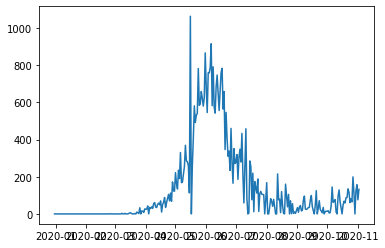

In [6]:
# df_afg_new_cases['new_cases'] = df_afg_new_cases['new_cases'].astype(float)
plt.plot(df_afg_new_cases)
plt.show()


In [7]:
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import acf, pacf

In [8]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

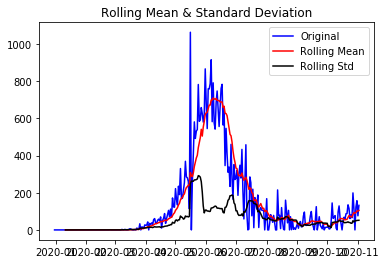

In [9]:
test_stationarity(df_afg_new_cases)

In [10]:
def difference(dataset, interval=1):
    index = list(dataset.index)
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset["new_cases"][i] - dataset["new_cases"][i - interval]
        diff.append(value)
    return (diff)

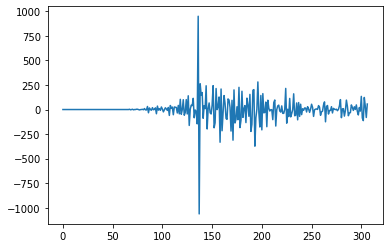

In [11]:
diff = difference(df_afg_new_cases)
plt.plot(diff)
plt.show()

C:\Users\keyur_shrimali\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


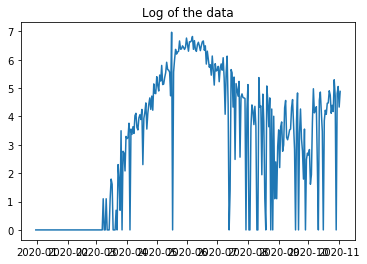

In [12]:
# import pint
# ureg = pint.UnitRegistry()
# ts_log = np.log(df_afg_new_cases)

logs = np.where(df_afg_new_cases > 0, np.log(df_afg_new_cases), 0)
ts_log = pd.DataFrame(logs, index=df_afg_new_cases.index, columns=['new_cases'])
plt.title('Log of the data')
plt.plot(ts_log)
plt.show()

In [13]:
# ts_log['new_cases'] = ts_log['new_cases'].replace('-inf', 0, regex=True)
ts_log 

,new_cases
date,
2019-12-31,0.000000
2020-01-01,0.000000
2020-01-02,0.000000
2020-01-03,0.000000
2020-01-04,0.000000
...,...
2020-10-29,0.000000
2020-10-30,4.812184
2020-10-31,5.056246


<h3>Moving Average</h3>

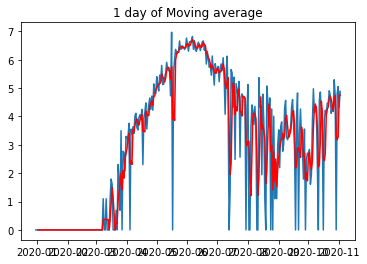

In [14]:
moving_avg = ts_log.rolling(window=3).mean()
plt.plot(ts_log)
plt.title('1 day of Moving average')
plt.plot(moving_avg, color='red')
plt.show()
ts_log_moving_avg_diff = ts_log - moving_avg

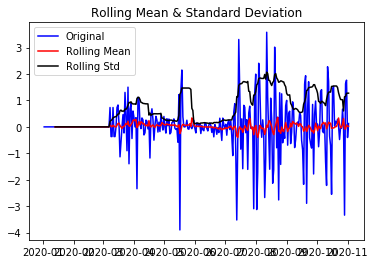

In [15]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

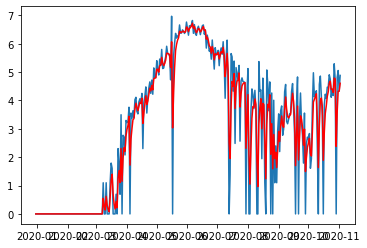

In [16]:
expwighted_avg = ts_log.ewm(halflife=1).mean()
#parameter halflife is used to define the amount of exponential decay
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')
plt.show()

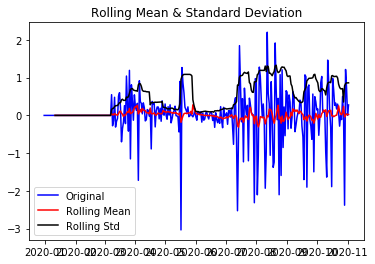

In [17]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

<h3>Differencing</h3>

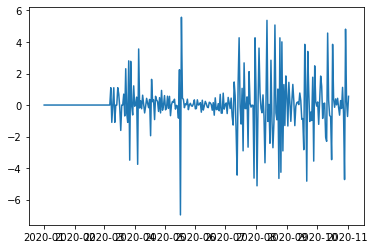

In [18]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)
plt.show()

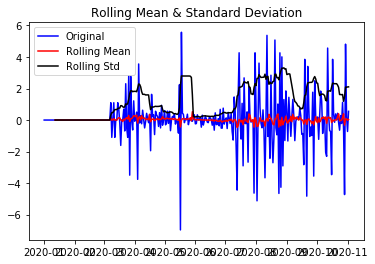

In [19]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

<h3>Decomposition</h3>

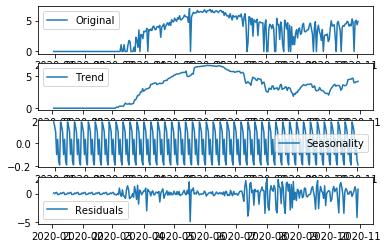

<Figure size 432x288 with 0 Axes>

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.show()
plt.tight_layout()

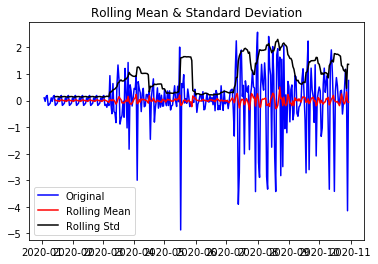

In [21]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

C:\Users\keyur_shrimali\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


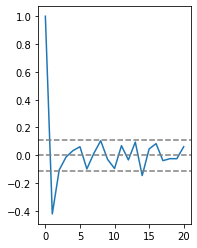

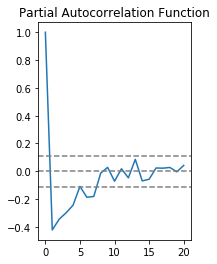

<Figure size 432x288 with 0 Axes>

In [22]:

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.show()
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.show()
plt.tight_layout()

<h2>AR Model</h2>

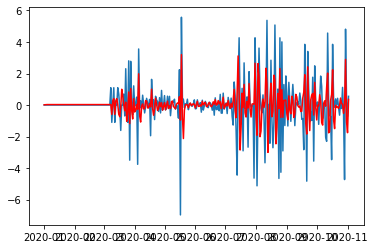

In [23]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(ts_log, order=(2, 1, 0), freq=ts_log.index.inferred_freq)  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.show()

<h2>MA Model</h2>

C:\Users\keyur_shrimali\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\keyur_shrimali\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


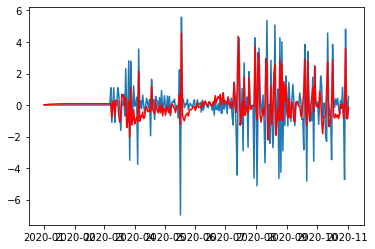

In [24]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')

<h2>Combined Model</h2>

C:\Users\keyur_shrimali\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\keyur_shrimali\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


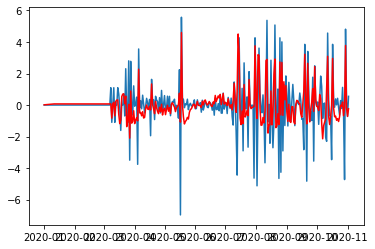

In [25]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')

In [26]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

date
2020-01-01    0.014028
2020-01-02    0.019937
2020-01-03    0.026898
2020-01-04    0.034525
2020-01-05    0.042348
dtype: float64


In [27]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

date
2020-01-01    0.014028
2020-01-02    0.033964
2020-01-03    0.060862
2020-01-04    0.095387
2020-01-05    0.137735
dtype: float64


In [28]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

C:\Users\keyur_shrimali\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


date
2019-12-31         NaN
2020-01-01    0.014028
2020-01-02    0.033964
2020-01-03    0.060862
2020-01-04    0.095387
dtype: float64

(array([737425., 737456., 737485., 737516., 737546., 737577., 737607.,
        737638., 737669., 737699., 737730.]),
 <a list of 11 Text xticklabel objects>)

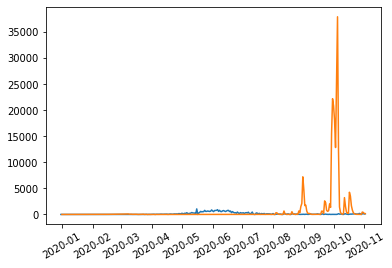

In [36]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df_afg_new_cases)
plt.plot(predictions_ARIMA)
plt.xticks(rotation=30)
# plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-df_afg_new_cases)**2)/len(df_afg_new_cases)))

In [30]:
predictions_ARIMA

date
2019-12-31           NaN
2020-01-01      1.014127
2020-01-02      1.034548
2020-01-03      1.062752
2020-01-04      1.100085
                 ...    
2020-10-29     10.544065
2020-10-30    460.131112
2020-10-31    383.298370
2020-11-01    187.187479
2020-11-02    147.655524
Length: 308, dtype: float64

In [31]:
df_afg_new_cases

,new_cases
date,
2019-12-31,0.0
2020-01-01,0.0
2020-01-02,0.0
2020-01-03,0.0
2020-01-04,0.0
...,...
2020-10-29,0.0
2020-10-30,123.0
2020-10-31,157.0
